In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [216]:
import requests
from io import BytesIO

url1 = "https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/raw/b16e9d3debb600bbc605809958816a7a78c9bab7/Flight%20Prediction/Data_Train.xlsx"
# Download the file
response1 = requests.get(url1)
content1 = response1.content
# Read the Excel file into a DataFrame
train_df = pd.read_excel(BytesIO(content1), engine='openpyxl')  # or engine='xlrd' if it's an older Excel file

In [217]:
url2 = "https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/raw/b16e9d3debb600bbc605809958816a7a78c9bab7/Flight%20Prediction/Test_set.xlsx"

# Download the file
response2 = requests.get(url2)
content2 = response2.content

# Read the Excel file into a DataFrame
test_df = pd.read_excel(BytesIO(content2), engine='openpyxl')

In [218]:
train_df.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5323,Jet Airways,21/05/2019,Kolkata,Banglore,CCU → BOM → BLR,14:05,10:05 22 May,20h,1 stop,No info,14388


In [219]:
test_df.sample()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
649,Air India,24/03/2019,Banglore,New Delhi,BLR → DEL,17:00,19:45,2h 45m,non-stop,No info


In [220]:
train_df.shape, test_df.shape

((10683, 11), (2671, 10))

In [221]:
df = pd.concat([train_df, test_df])

In [222]:
df.shape

(13354, 11)

In [223]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [225]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)

<ipython-input-225-414c242f3981>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey)


In [226]:
df['Date'] = df.Date_of_Journey.dt.day
df['Month'] = df.Date_of_Journey.dt.month
df['Year'] = df.Date_of_Journey.dt.year

In [227]:
df = df.drop('Date_of_Journey', axis=1)

In [228]:
df.Arrival_Time = df.Arrival_Time.str.split(" ").str.get(0)

In [229]:
time = pd.to_timedelta(df.Arrival_Time + ':00')

In [230]:
df['Arrival_hour'] = time.dt.components['hours']
df['Arrival_minute'] = time.dt.components['minutes']

In [231]:
df = df.drop('Arrival_Time', axis=1)

In [232]:
df.Dep_Time = df.Dep_Time.str.split(" ").str.get(0)

time = pd.to_timedelta(df.Dep_Time + ':00')

df['Dep_hour'] = time.dt.components['hours']
df['Dep_minute'] = time.dt.components['minutes']
df = df.drop('Dep_Time', axis=1)

In [233]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [234]:
df.Total_Stops = df.Total_Stops.map({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4, 'nan': 1})

In [235]:
df = df.drop('Route', axis=1)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int64  
 8   Month            13354 non-null  int64  
 9   Year             13354 non-null  int64  
 10  Arrival_hour     13354 non-null  int64  
 11  Arrival_minute   13354 non-null  int64  
 12  Dep_hour         13354 non-null  int64  
 13  Dep_minute       13354 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 1.5+ MB


In [237]:
df.drop(6474, axis=0, inplace=True)
df.drop(2660, axis=0, inplace=True)

In [238]:
hour = df['Duration'].str.split(' ').apply(lambda x: next((item for item in x if 'h' in item), None)).str.replace('h', '').fillna(0).astype(int)
minute = df['Duration'].str.split(' ').apply(lambda x: next((item for item in x if 'm' in item), None)).str.replace('m', '').fillna(0).astype(int)

In [239]:
def total_minutes(hour, minute):
  hour_to_min = hour * 60

  total_minutes = hour_to_min + minute

  return total_minutes

In [240]:
df['Total_Hour_Duration'] = total_minutes(hour, minute)

In [241]:
df.drop('Duration', axis=1, inplace=True)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airline              13351 non-null  object 
 1   Source               13351 non-null  object 
 2   Destination          13351 non-null  object 
 3   Total_Stops          13350 non-null  float64
 4   Additional_Info      13351 non-null  object 
 5   Price                10681 non-null  float64
 6   Date                 13351 non-null  int64  
 7   Month                13351 non-null  int64  
 8   Year                 13351 non-null  int64  
 9   Arrival_hour         13351 non-null  int64  
 10  Arrival_minute       13351 non-null  int64  
 11  Dep_hour             13351 non-null  int64  
 12  Dep_minute           13351 non-null  int64  
 13  Total_Hour_Duration  13351 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.5+ MB


In [243]:
df = df.rename(columns={'Total_Hour_Duration': 'Total_Minute_Duration'})

In [244]:
df.sample(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Total_Minute_Duration
8122,Air Asia,Banglore,New Delhi,0.0,Red-eye flight,10873.0,3,1,2019,2,10,23,25,165
4898,IndiGo,Kolkata,Banglore,0.0,No info,4804.0,21,6,2019,14,5,11,30,155


In [245]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [246]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [247]:
df.Airline = le.fit_transform(df.Airline)

In [248]:
df.Source = le.fit_transform(df.Source)
df.Destination = le.fit_transform(df.Destination)

In [249]:
df.Additional_Info = le.fit_transform(df.Additional_Info)

In [250]:
df.shape

(13351, 14)

In [251]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Total_Minute_Duration
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2.0,8,7662.0,5,1,2019,13,15,5,50,445
2,4,2,1,2.0,8,13882.0,6,9,2019,4,25,9,25,1140


<Axes: xlabel='Total_Minute_Duration', ylabel='Price'>

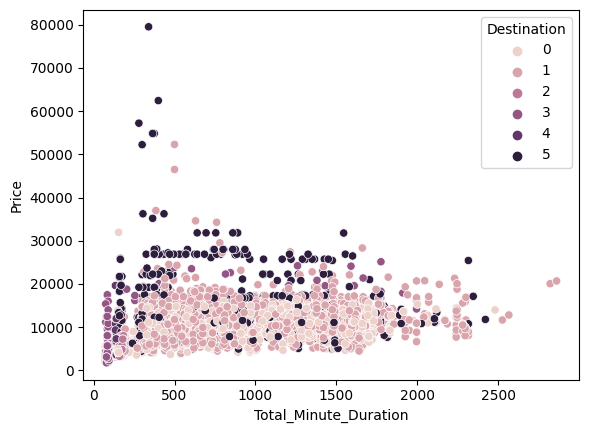

In [252]:
sns.scatterplot(x='Total_Minute_Duration', y='Price', data=df, hue='Destination')

In [253]:
df.corr()['Price']

Airline                 -0.039321
Source                   0.015709
Destination             -0.071282
Total_Stops              0.603742
Additional_Info         -0.065618
Price                    1.000000
Date                    -0.165209
Month                    0.010494
Year                          NaN
Arrival_hour             0.024221
Arrival_minute          -0.086548
Dep_hour                 0.006770
Dep_minute              -0.024776
Total_Minute_Duration    0.506638
Name: Price, dtype: float64